# SVM Tutorial with Python

---

본 튜토리얼은 SVM의 일부분만 다루고 있습니다. 

전체적인 개념을 알고 싶으시다면 고려대학교 강필성 교수님의 [비즈니스 애널리틱스 수업 영상](https://www.youtube.com/watch?v=gzbafL28vA0&list=PLetSlH8YjIfWMdw9AuLR5ybkVvGcoG2EW&index=9)을 참고해주세요! 😉



### 🙄 SVM이란? 
**Support Vector Machine**(SVM: Support Vector Machine)은 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델입니다!  

따라서 분류되지 않은 새로운 점이 나타나면 경계의 어느 쪽에 속하는지 확인해서 분류 과제를 수행할 수 있습니다.

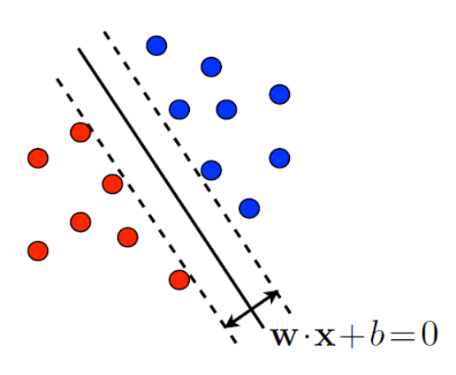
SVM이라고 하면 대부분 위의 사진처럼 **하나의 직선**으로 분류하는 경우를 많이 떠올리실 겁니다. 하지만 SVM은 해당 경우만 존재하는 것은 아닙니다!

몇가지의 Case가 존재하는데요.

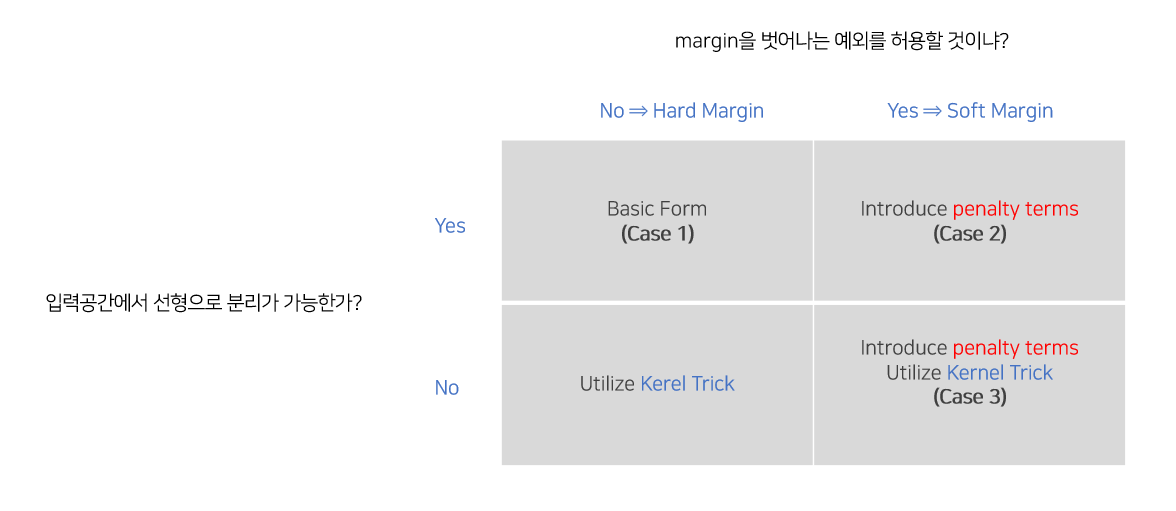

두 가지의 기준에 따라 Case가 나뉩니다. <br> 
1️⃣입력공간에서 선형으로 분리가 가능한지 <br>
2️⃣ margin을 벗어나는 예외를 허용할 것인지 

위에서 보신 경우는 입력 공간에서 선형적으로 분리가 가능하고 margin을 벗어나는 예외를 허용하지 않는 Hard margin인 Case 1의 예시였습니다!

하지만 오늘 저는 선형적인 Case가 아닌 non-linear SVM, 그중에서도 **Kernel Trick**과 관련된 실험을 진행해보고자 합니다.

 <br>
  <br>
   <br>


### 🙄 Kernel Trick이란? 
실험에 앞서 kernel trick이 무엇인지 알고 가시죠!

Linear SVM을 사용하고자 할 때, 선형으로 완전히 분리할 수 없는 데이터 분포를 만난다면 분류가 잘 될까요?
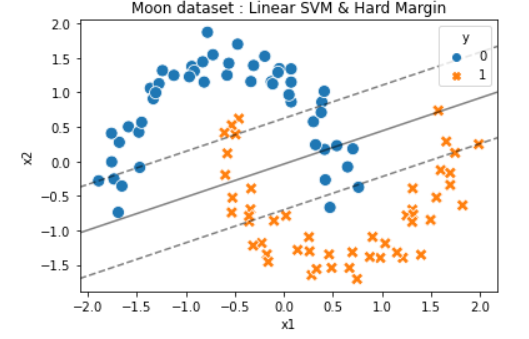
위와 같이 당연히 분류가 잘 안 될 것입니다. soft margin을 두어 어느 정도의 오류를 허용하더라도 성능이 잘 나오진 않을 것입니다. 

<br>

그렇다면 linear하게 seperable하지 않은 data들을 좀 더 구불구불한 decision boundary로 분류할 수 있다면 좋겠죠!

이때, 특정 mapping function을 이용하여 input data를 높은 차원 위에 나타낼 수 있습니다. 그러면 고차원에서 하나의 선으로 분류될 수 있게 되는데,
결국 원래 input의 차원에서는 아래 사진과 같이 구불구불하게 분류해낸 것이 됩니다. 
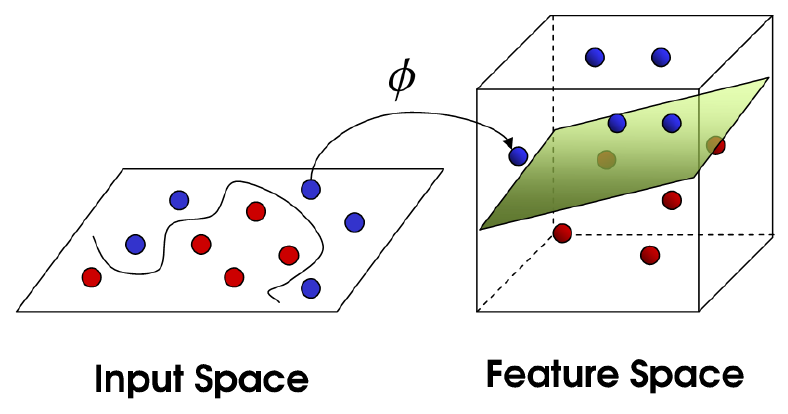

이렇게 모든 관측치를 고차원으로 mapping하고 내적까지 하면 연산량이 많아진다는 단점이 있습니다.🤣 <br>
해당 연산량 문제를 해결하기 위해 이용하는 것이 바로 **kernel trick**입니다!😎 고차원 mapping과 고차원에서의 내적 연산을 한 번에 할 수 있는 방법이죠.


커널 K는 연속함수 $K(x,y)$ 로 실수, 함수나 벡터 등등을 x,y 인자로 받고 실수를 내뱉는 symmetric한 함수입니다.<br>
SVM에서는 mapping function $ϕ(x)^T,ϕ(x)$를 인자로 받고 내적하여 실수를 출력하는 것이죠. <br>
따라서, 직접 mapping을 하지 않아도 되고 그냥 Kernel 종류 하나만 정해서 계산을 하면 되는 것입니다!

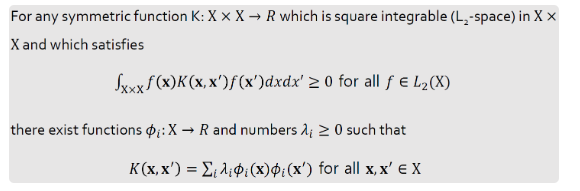
다음은 Mercer's Theorem으로 위의 조건을 만족하는 임의의 함수는 모두 커널 함수로 쓸 수 있다고 합니다. 


이때, Kernel "Trick"이라고 표현하는 이유는 모든 데이터를 고차원으로 mapping하지 않고 꼼수를 이용해 mapping과정을 한 것과 같은 효과를 내게 만들었기 때문입니다!


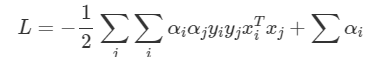

위 식에서는 사실 각 데이터에 대한 mapping은 계산할 필요가 없습니다. 무슨 뜻이냐면  $ϕ(x)$을 구하지 않고 바로 $ϕ(x)^Tϕ(x)$를 구하면 되는 겁니다.<br> 즉, 커널 함수는 고차원의 각 점들을 구할 필요없이 고차원에서 내적을 바로 구해버리는 지름길 같은 거죠! 그래서 trick이라고 하는 겁니다.


 <br>
  <br>
   <br>
 <br>
  <br>

### Kernel 종류 📚
그렇다면 자주 쓰이는 Kernel 종류를 알아보겠습니다. (sklearn.svm 기준)
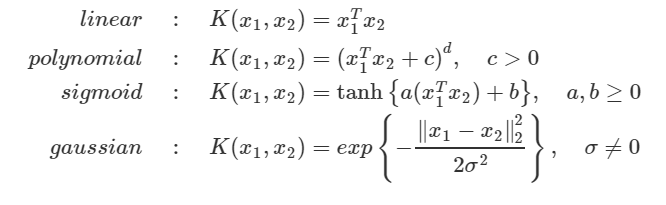

`Linear` kernel은 Linear SVM과 동일하다고 보면 됩니다~!<br>
`Polynomial` kernel은 다항 커널이라고도 합니다. 벡터의 내적으로 정의된 커널을 확장하여 만든 커널입니다.<br>
`Gaussian` kernel은 RBF 커널이라고도 하는데요. 차수가 무한대인 다항 커널과 같습니다.<br>


그렇다면 이 Kernel들이 어떠한 경우에 적합한지,어떤 커널을 써야될 지 고민해본 적 있으신가요? 🙄 <br> 
사실 저는 아직 잘 모르겠습니다 😂
그래서 오늘은 제가 조사한 자료들과 실험을 통해 위 질문들의 답을 찾아가보도록 하겠습니다. 😎  <br> 
(`Sigmoid`kernel은 잘 사용하지 않기 때문에 실험에서는 다루지 않겠습니다!)

일단 강의와 머신러닝 서적에서는 kernel을 선택하는 경우가 아래와 같다고 합니다.
* 여러 가지 커널 중 선형 커널을 먼저 시도해보는 것이 좋다.
     * 특히, 훈련 세트가 적고, feature가 많은 경우에 사용하는 것이 낫다. 
        <br> => 높은 차원의 feature를 가지고 복잡한 함수로 decision boundary를 맞추려고 하면, training example 수가 적어서 과적합의 위험이 있다.
* 훈련세트가 너무 크지 않다면 RBF 커널이 대부분 잘 맞는다.

과연 위의 경우가 잘 맞는지... 제가 한 번 여러가지 데이터셋을 가지고 확인해보도록 하겠습니다!

---
💡 여러분이 각 커널마다 최적화를 위해 조정해야 되는 매개변수는 다음과 같습니다.
* kernel = "linear" : 선형 SVM

* kernel = "poly": 다항 커널
  * gamma: $\gamma$
    * 클수록 작은 표준 편차를 가짐. 한 데이터 포인트들이 영향력을 행사하는 거리가 짧아짐
    * 결정 경계의 곡률을 조절하는 것으로도 볼 수 있음
    * C와 마찬가지로 너무 낮으면 과소적합될 가능성이 크고, 너무 높으면 과대적합의 위험이 있음
  * coef0: $\theta$
  * degree: $d$

* kernel = "rbf" 또는 kernel = None: RBF 커널
    * gamma: $\gamma$
* C : cost
  * C 값을 낮게 설정하면 이상치들이 있을 가능성을 크게 잡아 일반적인 결정 경계를 찾아냄
  * 높게 설정하면 이상치의 존재 가능성을 낮게 봐서 좀 더세심하게 결정경계를 찾아냄
---


## 📃 Iris Dataset

임의의 데이터 셋이 주어지면 일반적으로는 어떤 커널이 가장 잘 작동하는지 모릅니다. 
<br> 대부분 데이터에 대해 잘 알지 못하기 때문에 단순한 저차원의 공간에서 고차원 공간으로 나아가는 것이 좋다고 하네요. 

만약 데이터 세트가 선형으로 분리 가능한 경우 `Linear kernel`은 제대로 작동할 것입니다. 간단하게 iris 데이터 셋으로 확인해보겠습니다.

In [177]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, make_moons, make_circles, load_breast_cancer, load_wine
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [159]:
# 데이터 불러오기
iris = load_iris()
iris_X = iris['data'][:,(2,3)]

# 스케일링
scaler = StandardScaler()
iris_X = scaler.fit_transform(iris_X)

# 데이터프레임 만들기
df = pd.DataFrame(iris_X, columns=['petal length', 'petal width'])
df['target'] = iris['target']
df

,petal length,petal width,target
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0
...,...,...,...
145,0.819596,1.448832,2
146,0.705921,0.922303,2
147,0.819596,1.053935,2
148,0.933271,1.448832,2


💡 중요 :  SVM은 스케일링에 따라 데이터들이 찍히는 위치가 달라지고, 그에 따라서 결정 경계가 달라지기 때문에 스케일링을 잘 해줘야 됩니다~!

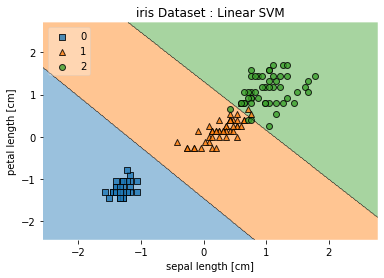

In [160]:
C=100
Linear_SVM = SVC(kernel='linear', C=C)
Linear_SVM.fit(df[['petal length', 'petal width']].values, df['target'].values)

# plot 그리기
plot_decision_regions(iris_X, df['target'].values, clf=Linear_SVM, legend=2, )

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('iris Dataset : Linear SVM')
plt.show()

역시 분류를 잘 하는군요~! 이번에는 같은 데이터셋에 `RBF kernel`를 사용해보겠습니다.

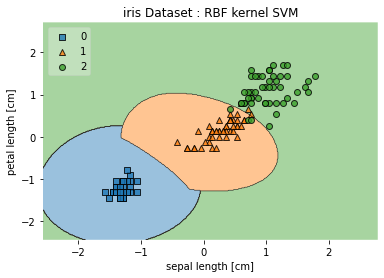

In [161]:
rbf_SVM = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
rbf_SVM.fit(df[['petal length', 'petal width']].values, df['target'].values)

# plot 그리기
plot_decision_regions(iris_X, df['target'].values, clf=rbf_SVM, legend=2, )

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('iris Dataset : RBF kernel SVM')
plt.show()

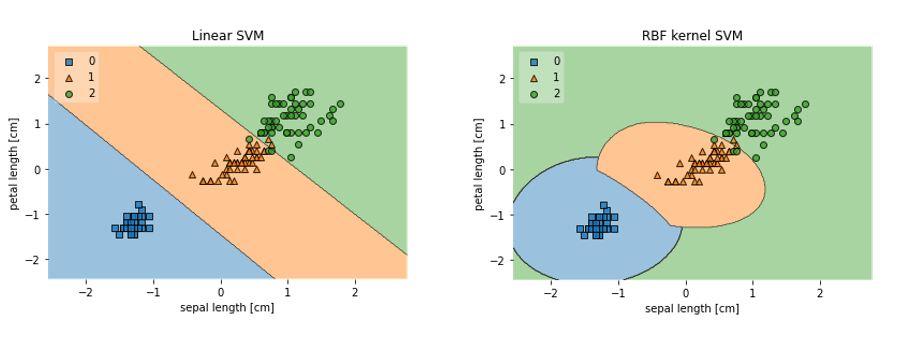
RBF kernel도 linear SVM을 사용했을 때처럼 iris dataset의 class 구분을 잘 하네요!
이런 경우에는 어떤 kernel을 사용하는게 더 좋을까요? 🙄

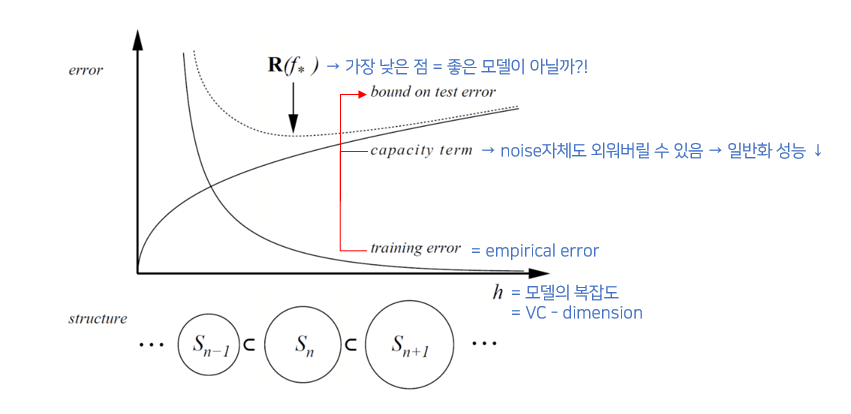

구조적 위험 최소화 접근법에 따르면 **동일한 정확도**를 가진 모델이라면 상대적으로 **복잡도가 낮은** 모델이 선호되어야 된다고 합니다! <br>
모델이 복잡해질수록 training error는 줄어들지만 그만큼 일반화성능은 떨어지기 때문이죠!
<br>

그렇다면 위의 iris 데이터문제에서는 RBF kernel SVM보다 단순한 Linear SVM을 사용하는 것이 좋겠죠? 😉 <br>
비슷한 성능을 내는데 굳이 고차원으로 맵핑해주는 연산을 할 필요는 없으니까요! 조정해야될 파라미터도 RBF kernel이 많습니다.

하지만 Linear SVM이 항상 모든 dataset에 적합한 건 아닙니다. 😑 dataset 형태에 따라 다른 커널을 사용해야 될 때도 있겠죠! <br>
만약 데이터셋이 선형적으로 분리가 될 수 없다면 Linear SVM을 사용하는 것은 의미가 없을 겁니다.


## 📃 Moon Dataset 
그 예시로 Moon Dataset을 가져왔습니다!

<AxesSubplot:xlabel='x1', ylabel='x2'>

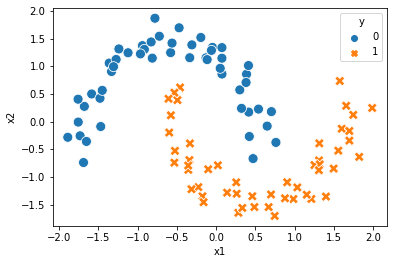

In [162]:
m_X, m_y  = make_moons(n_samples=100, noise=0.1, random_state = 42)
# 스케일링
m_X = scaler.fit_transform(m_X)
moon_df = pd. DataFrame(m_X, columns =['x1','x2'])
moon_df['y'] = m_y 
# plot 그리기
sns.scatterplot(x='x1', y='x2', hue = 'y', style= 'y', s=100, data = moon_df)

먼저 `Linear SVM`으로 분류를 해보겠습니다!

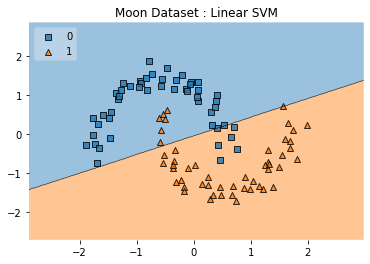

In [163]:
C=100
Linear_SVM2 = SVC(kernel='linear', C=C)
Linear_SVM2.fit(m_X, moon_df['y'].values)

# plot 그리기
plot_decision_regions(m_X, moon_df['y'].values, clf=Linear_SVM2, legend=2, )

plt.title('Moon Dataset : Linear SVM')
plt.show()

선형적으로 분리가 되는 데이터셋이 아니기 때문에 제대로 분류하지 못하네요.

그렇다면 `RBF kernel`을 사용해보겠습니다.

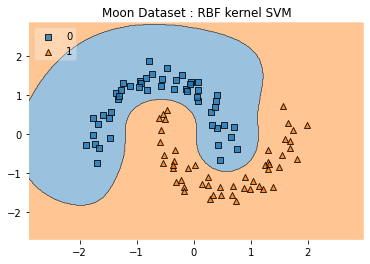

In [164]:
rbf_SVM2 = SVC(kernel='rbf', random_state=0, gamma=1, C=100)
rbf_SVM2.fit(m_X, moon_df['y'].values)

# plot 그리기
plot_decision_regions(m_X, moon_df['y'].values, clf=rbf_SVM2, legend=2, )

plt.title('Moon Dataset : RBF kernel SVM')
plt.show()

역시 non-linear한 kernel인 `RBF kernel`을 사용했을 때 분류를 더 잘합니다! 😊 <br>
`polynomial kernel`을 적용했을 때의 결과도 확인해보겠습니다.

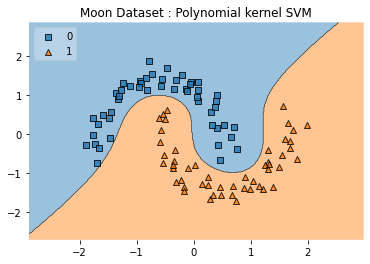

In [165]:
poly_SVM= SVC(kernel='poly', random_state=0, degree=3,coef0=1,C= 100)
poly_SVM.fit(m_X, moon_df['y'].values)

# plot 그리기
plot_decision_regions(m_X, moon_df['y'].values, clf=poly_SVM, legend=2, )

plt.title('Moon Dataset : Polynomial kernel SVM')
plt.show()

`polynomial kernel`도 분류를 잘 하네요! 아직까지는 polynomial이 좋은지 RBF가 좋은지 잘 모르겠습니다 ㅎㅎ..
다른 데이터 셋에도 적용해보겠습니다!

## 📃 Wisconsin Diagnostic Dataset 

유방암 양성/음성을 구분하는 binary classification 데이터셋입니다.

feature 수가 30개로 앞에서 사용했던 데이터셋보다 feature 수가 많은 데이터는 어떤 결과가 나올까요?

In [166]:
cancer = load_breast_cancer()
c_X=cancer.data
# 스케일링
c_X = scaler.fit_transform(c_X)
cancer_df = pd.DataFrame(c_X, columns=cancer.feature_names)
cancer_df['class'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


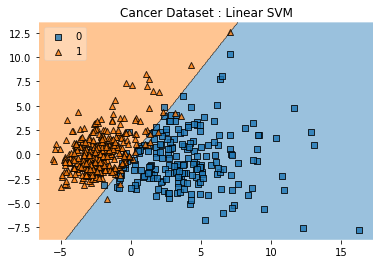

In [167]:
C=100
Linear_SVM3 = SVC(kernel='linear', C=C)
pca = PCA(n_components = 2)
c_X= pca.fit_transform(c_X)
# 2차원 plot으로 나타내기 위해 PCA를 사용해줬습니다!

Linear_SVM3.fit(c_X, cancer_df['class'].values)

# plot 그리기
plot_decision_regions(c_X, cancer_df['class'].values, clf=Linear_SVM3, legend=2)

plt.title('Cancer Dataset : Linear SVM')
plt.show()

linear SVM을 사용하였을 때 분류를 꽤 잘하는 것으로 보이네요~

`rbf kernel`과 `polynomial kernel`의 결과도 보시죠!

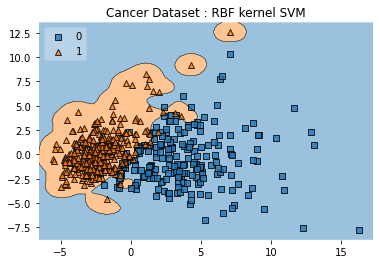

In [168]:
C=100
rbf_SVM3 = SVC(kernel='rbf', random_state=0, gamma=1, C=100)
rbf_SVM3.fit(c_X, cancer_df['class'].values)

# plot 그리기
plot_decision_regions(c_X, cancer_df['class'].values, clf=rbf_SVM3, legend=2)

plt.title('Cancer Dataset : RBF kernel SVM')
plt.show()

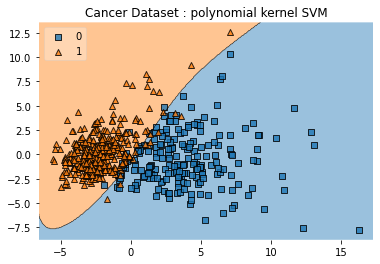

In [169]:
poly_SVM2= SVC(kernel='poly', random_state=0,degree=3,coef0=1 ,C= 100)
poly_SVM2.fit(c_X, cancer_df['class'].values)

# plot 그리기
plot_decision_regions(c_X, cancer_df['class'].values, clf=poly_SVM2, legend=2, )

plt.title('Cancer Dataset : polynomial kernel SVM')
plt.show()

결과를 비교해보겠습니다! 😀
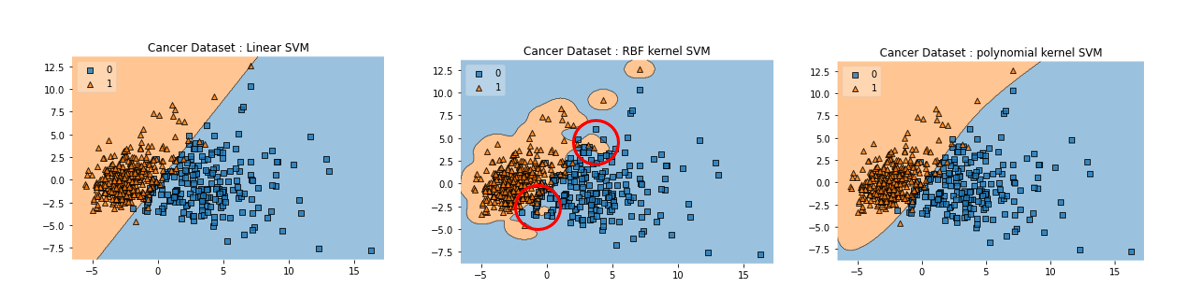



Linear SVM이 제대로 분류하지 못해던 부분을 `rbf`와 `polynomial` kernel이 잘 분류하네요! 
하지만 표시된 빨간 부분은 `rbf kernel`만 잘 분류했습니다. 

poly nomial kerneml의 매개변수 중 `gamma` 값을 조정해보면 다음과 같은 결과가 나옵니다.
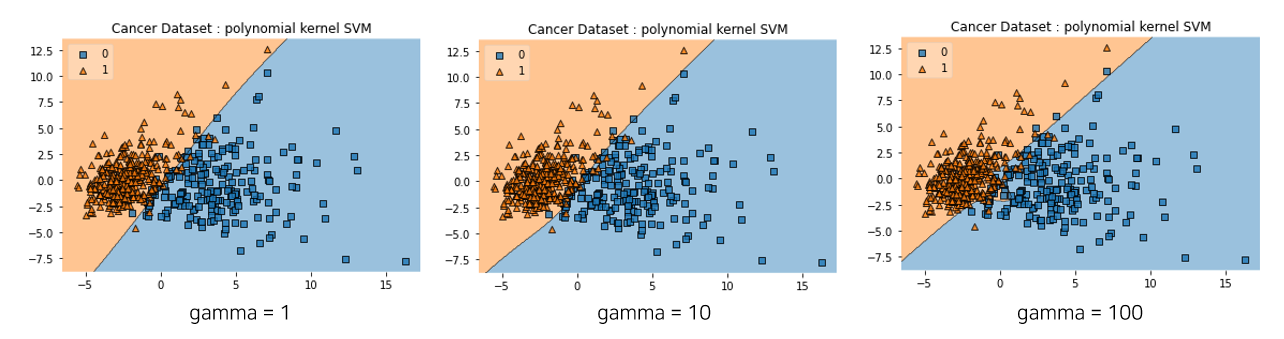

gamma가 1에서 100으로 증가할 수록 결정경계면이 구불구불해지는 걸 확인할 수 있습니다. 하지만 그만큼 학습시간도 오래걸리네요! 😣

## 📃 Wine Dataset 

마지막으로 wine dataset에 적용해 보겠습니다! 🍷 class가 3개로 이루어진 데이터입니다.

In [170]:
wine = load_wine()
w_X= wine.data
# 스케일링
w_X = scaler.fit_transform(w_X)
wine_df = pd.DataFrame(w_X, columns=wine.feature_names)
wine_df['class'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


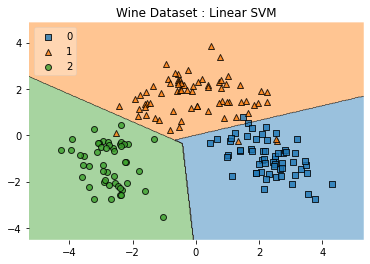

In [171]:
C=100
Linear_SVM4 = SVC(kernel='linear', C=C)
pca = PCA(n_components = 2)
w_X= pca.fit_transform(w_X)
# 2차원 plot으로 나타내기 위해 PCA를 사용해줬습니다!

Linear_SVM4.fit(w_X, wine_df['class'].values)

# plot 그리기
plot_decision_regions(w_X, wine_df['class'].values, clf=Linear_SVM4, legend=2)

plt.title('Wine Dataset : Linear SVM')
plt.show()

linear SVM은 역시 무난무난하게 잘 분류를 합니다.🙂

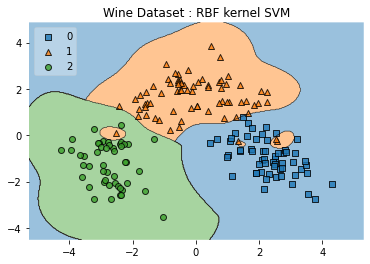

In [172]:
C=100
rbf_SVM4 = SVC(kernel='rbf', random_state=0, gamma=1, C=100)
rbf_SVM4.fit(w_X, wine_df['class'].values)

# plot 그리기
plot_decision_regions(w_X, wine_df['class'].values, clf=rbf_SVM4, legend=2)

plt.title('Wine Dataset : RBF kernel SVM')
plt.show()

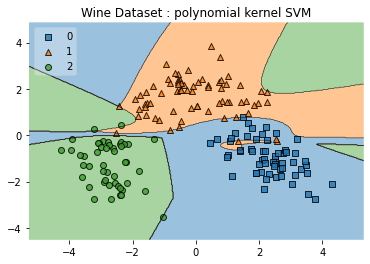

In [173]:
poly_SVM3= SVC(kernel='poly', random_state=0, degree=4,coef0=1, C= 1000, gamma=10)
poly_SVM3.fit(w_X, wine_df['class'].values)

# plot 그리기
plot_decision_regions(w_X, wine_df['class'].values, clf=poly_SVM3, legend=2, )

plt.title('Wine Dataset : polynomial kernel SVM')
plt.show()

유방암 데이터처럼 polynomial kernel과 rbf kernel이 linear 보다 잘 분류를 합니다.

여기서도 `polynomial` kernel의 `gamma`를 조정해보면,
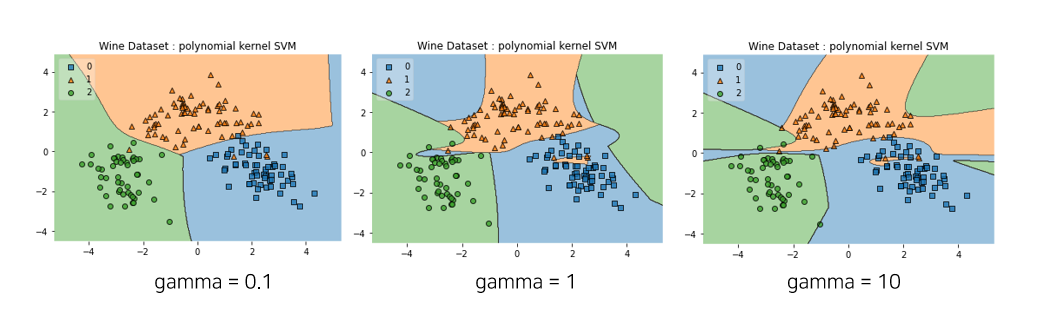
다음과 같이 gamma값이 증가할수록 분류를 잘 합니다 ㅎㅎ! 하지만 역시 학습시간도 오래 걸리네요..

일단 시각화해서 봤을 때는..
* linear하게 seperable 할 수 있는 데이터라면 : linear SVM로~
* linear하게 seperable 할 수 없는 데이터라면 : rbf와 polynomial 둘 다 비슷한 성능을 보임, but polynomial의 매개변수가 더 많기 때문에 rbf를 쓰는 게 나아보입니다 ㅎㅎ

그렇다면 실제로 test set을 예측해서 성능을 비교해볼까요? 🙄 

## 📊 정확도 비교

4개의 dataset에 대한 성능을 비교해보았습니다~~~

### iris dataset

In [187]:
x_train, x_test, y_train, y_test = train_test_split(iris_X, iris.target, test_size=0.3)

SVM1 = SVC(kernel= 'linear', C=100)
SVM2 = SVC(kernel= 'rbf', random_state=0, gamma=1, C=100)
SVM3 = SVC(kernel= 'poly', random_state=0,degree=3, coef0=1, C=100)

SVM1.fit(x_train,y_train)
SVM2.fit(x_train,y_train)
SVM3.fit(x_train,y_train)

# train acc, test acc
print(SVM1.score(x_train,y_train),SVM1.score(x_test,y_test))
print(SVM2.score(x_train,y_train),SVM2.score(x_test,y_test))
print(SVM3.score(x_train,y_train),SVM3.score(x_test,y_test))

print(classification_report(y_test, SVM1.predict(x_test), target_names=['class 0', 'class 1', 'class 2']))
print(classification_report(y_test, SVM2.predict(x_test), target_names=['class 0', 'class 1', 'class 2']))
print(classification_report(y_test, SVM3.predict(x_test), target_names=['class 0', 'class 1', 'class 2']))

0.9523809523809523 1.0
0.9714285714285714 1.0
0.9523809523809523 1.0
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        17
     class 1       1.00      1.00      1.00        12
     class 2       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        17
     class 1       1.00      1.00      1.00        12
     class 2       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        17
     class 1       1.00      1.00      1.00        12
     c

위에서부터 `linear`,`rbf`,`polynomial` 순서 입니다. 🙃 <br>
iris 데이터셋은 시각화부분에서도 모든 kernel이 분류를 잘 했었는데 test set을 예측한 성능도 좋게 나왔네요 ㅎㅎ

### Moon dataset
선형적으로 분리되지 않는 데이터셋이였죠!

In [186]:
x_train, x_test, y_train, y_test = train_test_split(m_X, m_y, test_size=0.3)

m_SVM1 = SVC(kernel='linear', C=100)
m_SVM2 = SVC(kernel='rbf', random_state=0, gamma=1, C=100)
m_SVM3 = SVC(kernel='poly', random_state=0,degree=3, coef0=1, C=100)

m_SVM1.fit(x_train,y_train)
m_SVM2.fit(x_train,y_train)
m_SVM3.fit(x_train,y_train)

# train acc, test acc
print(m_SVM1.score(x_train,y_train),m_SVM1.score(x_test,y_test))
print(m_SVM2.score(x_train,y_train),m_SVM2.score(x_test,y_test))
print(m_SVM3.score(x_train,y_train),m_SVM3.score(x_test,y_test))

print(classification_report(y_test, m_SVM1.predict(x_test), target_names=['class 0', 'class 1']))
print(classification_report(y_test, m_SVM2.predict(x_test), target_names=['class 0', 'class 1']))
print(classification_report(y_test, m_SVM3.predict(x_test), target_names=['class 0', 'class 1']))

0.8571428571428571 0.9
1.0 1.0
1.0 1.0
              precision    recall  f1-score   support

     class 0       0.92      0.86      0.89        14
     class 1       0.88      0.94      0.91        16

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        14
     class 1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        14
     class 1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00  

그래서 linear kernel을 제외한 두 kernel에서 분류를 완벽하게 했네요!

### Wisconsin Diagnostic Dataset

다음은 유방암 데이터셋입니다!

In [180]:
x_train, x_test, y_train, y_test = train_test_split(c_X, cancer.target, test_size=0.3)

c_SVM1 = SVC(kernel='linear', C=100)
c_SVM2 = SVC(kernel='rbf', random_state=0, gamma=1, C=100)
c_SVM3 = SVC(kernel='poly', random_state=0,degree=3, coef0=1, C=100)

c_SVM1.fit(x_train,y_train)
c_SVM2.fit(x_train,y_train)
c_SVM3.fit(x_train,y_train)

# train acc, test acc
print(c_SVM1.score(x_train,y_train),c_SVM1.score(x_test,y_test))
print(c_SVM2.score(x_train,y_train),c_SVM2.score(x_test,y_test))
print(c_SVM3.score(x_train,y_train),c_SVM3.score(x_test,y_test))

print(classification_report(y_test, c_SVM1.predict(x_test), target_names=['class 0', 'class 1']))
print(classification_report(y_test, c_SVM2.predict(x_test), target_names=['class 0', 'class 1']))
print(classification_report(y_test, c_SVM3.predict(x_test), target_names=['class 0', 'class 1']))

0.9472361809045227 0.9649122807017544
0.9773869346733668 0.9415204678362573
0.949748743718593 0.9298245614035088
              precision    recall  f1-score   support

     class 0       0.97      0.94      0.96        69
     class 1       0.96      0.98      0.97       102

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

              precision    recall  f1-score   support

     class 0       0.93      0.93      0.93        69
     class 1       0.95      0.95      0.95       102

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

              precision    recall  f1-score   support

     class 0       0.97      0.86      0.91        69
     class 1       0.91      0.98      0.94       102

    accuracy                           0.93       171
   macro avg   

앞서 시각화했던 결과에서는 rbf kernel이 분류을 제일 잘 했었는데요. 
<br> test set에 대한 결과는 linear kernel의 성능이 제일 높습니다! 😮 <br>
아무래도 train data의 수가 적은데 복잡한 형태의 분류경계면을 만들면서 오버피팅이 된것이 아닐까라는 생각이 듭니다..!

### Wine Dataset
wine dataset에 대한 결과도 한 번 볼까요?

In [182]:
x_train, x_test, y_train, y_test = train_test_split(w_X, wine.target, test_size=0.3)

w_SVM1 = SVC(kernel='linear', C=100)
w_SVM2 = SVC(kernel='rbf', random_state=0, gamma=1, C=100)
w_SVM3 = SVC(kernel='poly', random_state=0,degree=3, coef0=1, C=100)

w_SVM1.fit(x_train,y_train)
w_SVM2.fit(x_train,y_train)
w_SVM3.fit(x_train,y_train)


# train acc, test acc
print(w_SVM1.score(x_train,y_train),w_SVM1.score(x_test,y_test))
print(w_SVM2.score(x_train,y_train),w_SVM2.score(x_test,y_test))
print(w_SVM3.score(x_train,y_train),w_SVM3.score(x_test,y_test))

print(classification_report(y_test, w_SVM1.predict(x_test), target_names=['class 0', 'class 1', 'class 2']))
print(classification_report(y_test, w_SVM2.predict(x_test), target_names=['class 0', 'class 1', 'class 2']))
print(classification_report(y_test, w_SVM3.predict(x_test), target_names=['class 0', 'class 1', 'class 2']))

0.9596774193548387 0.9814814814814815
1.0 1.0
0.967741935483871 0.9814814814814815
              precision    recall  f1-score   support

     class 0       0.95      1.00      0.97        18
     class 1       1.00      0.95      0.97        20
     class 2       1.00      1.00      1.00        16

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        18
     class 1       1.00      1.00      1.00        20
     class 2       1.00      1.00      1.00        16

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

              precision    recall  f1-score   support

     class 0       0.95      1.00      0.97        18
     class 1       1.00      0.95      0.97   

여기서는 시각화 결과와 동일하게 모두 성능이 높게 나왔습니다. 그중에서도 rbf 커널의 성능이 제일 높네요! 

## 🚩 결론

일단 결론적으로는,,, 어떤 경우에 어떤 커널을 써야된다! 이렇게 딱 말할 수는 없을 것 같습니다. 

그래도 실험을 통해 느낀 점은 <br>
* linear하게 seperable 할 수 있는 데이터는 Linear SVM을 쓰는 것이 좋다! 굳이 복잡한 함수를 사용해서 일반화성능을 떨어뜨릴 필요는 없을 것 같습니다!
* non-linear한 데이터셋도 일단 linear SVM을 써봐도 좋다! 왜냐면 성능 차이가 많이 나지 않을 수 있기 때문이죠.
* rbf와 polynomial은 성능차이가 별로 없다! 하지만 저라면 rbf를 택할 것 같습니다. 왜냐하면 polynomial은 rbf보다 조정해야 되는 매개변수가 더 많기 때문이죠.
* 또한 파라미터 튜닝에 따라 성능차이가 날 것 같다! 제가 실험은 많이 안 해봤지만 polynomial 커널의 gamma를 바꿔보면서 파라미터에 따라 성능이 많이 변하겠구나를 느꼈습니다.

앞서 서적과 강의에서 찾은 내용이 얼추 다 맞는 내용이였던거 같네요 ㅎㅎ 

저의 튜토리얼은 여기까지입니다!  감사합니다~~~~ 😉


---
  
### 📫 참조  
[SVM 종류 및 스케일링 중요성](https://bigdaheta.tistory.com/25)

[SVM 그래프 그리기:margin,decision boundary](https://ekfkdlxm.tistory.com/41)

[그룹별 산점도 그리기](https://rfriend.tistory.com/414) 

https://hleecaster.com/ml-svm-concept/

https://sanghyu.tistory.com/14

https://ratsgo.github.io/machine%20learning/2017/05/30/SVM3/

https://www.sallys.space/blog/2018/05/30/svm/

https://www.kdnuggets.com/2016/06/select-support-vector-machine-kernels.html

https://bskyvision.com/entry/%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0SVM%EC%9D%98-%EC%82%AC%EC%9A%A9%EC%9E%90%EB%A1%9C%EC%84%9C-%EA%BC%AD-%EC%95%8C%EC%95%84%EC%95%BC%ED%95%A0-%EA%B2%83%EB%93%A4-%EB%A7%A4%EA%B0%9C%EB%B3%80%EC%88%98-C%EC%99%80-gamma

핸즈 온 머신러닝 서적

Coursera : Andrew Ng의 SVM 강의